### exercise 7: tree based methods 

### task 2: regression trees 

In [1]:
import numpy as np
import pandas as pd
import graphviz

from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from IPython.display import Image, display
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(r'C:\Users\Chijun Zhang\Documents\jupyter\machine learning exercise\datasets\Boston.csv', index_col=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
X = df[df.columns[0:-1]].values 
y = df['medv'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

In [4]:
tree = DecisionTreeRegressor(criterion='mse', max_features=None, min_samples_split=20)

tree_est = tree.fit(X_train, y_train)

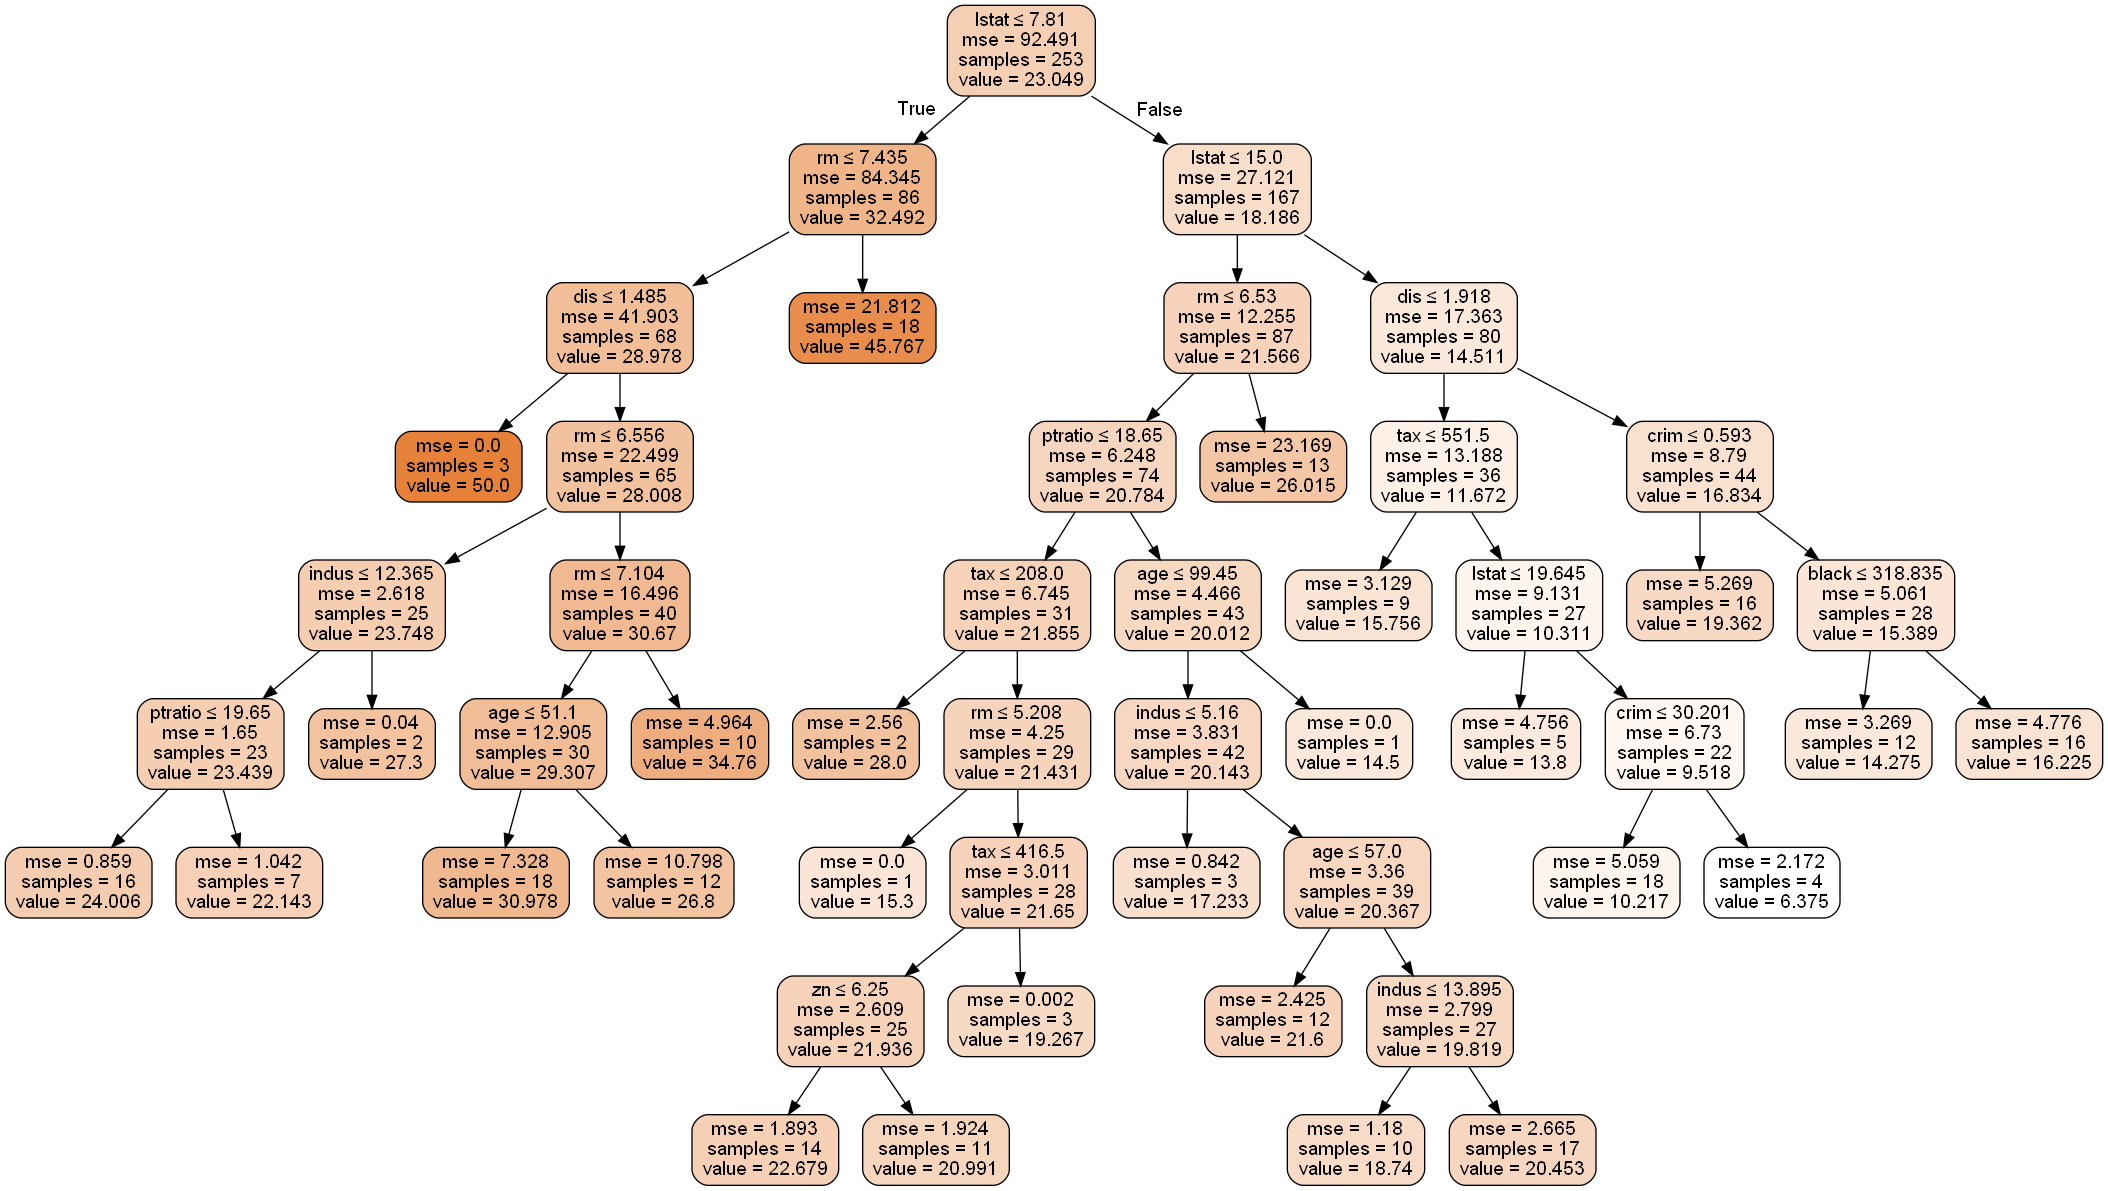

In [5]:
dot_data = export_graphviz(tree_est, out_file='boston_tree.dot',feature_names=df.columns[0:-1],filled=True, 
                           rounded=True, special_characters=True)

with open('boston_tree.dot') as f:
    dot_graph = f.read()  

I = graphviz.Source(dot_graph, format='png', engine='dot')

Image(I.render())

In [6]:
feature_importances = pd.Series(data=tree.feature_importances_, index=list(df.columns[0:-1]))
feature_importances.sort_values(axis=0, ascending=False)

lstat      0.629132
rm         0.242830
dis        0.087498
tax        0.013706
crim       0.009553
age        0.008370
ptratio    0.003570
indus      0.003348
black      0.001192
zn         0.000802
chas       0.000000
nox        0.000000
rad        0.000000
dtype: float64

In [7]:
y_pred = tree_est.predict(X_test)

print("Test MSE = ", np.mean((y_pred-y_test)**2))

Test MSE =  23.360695980614707


Text(0, 0.5, 'y_actual')

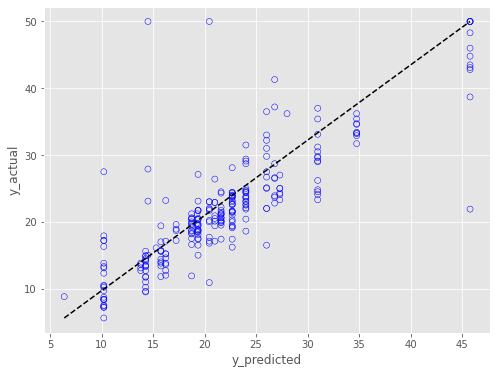

In [8]:
fig,ax = plt.subplots(1,1, figsize=(8,6));
ax.scatter(y_pred, y_test, facecolor='None', edgecolor='b');
ax.plot([min(y_pred), max(y_pred)], [min(y_test), max(y_test)], linestyle='--', color='k');
ax.set_xlabel('y_predicted')
ax.set_ylabel('y_actual')